In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import adjustText
from adjustText import adjust_text

In [3]:
def plot_beta(df, df_name):
    cumulative_pos = []
    running_pos = 0
    for chrom, group_df in df.groupby('CHR'):  
        cumulative_pos.append(group_df['BP'] + running_pos)
        running_pos += 100
        running_pos += group_df['BP'].max()

    df['cumulative_pos'] = pd.concat(cumulative_pos)
    g = sns.relplot(
        data = df,
        x = 'cumulative_pos',
        y = 'BETA_MEAN',
        aspect = 2.5,
        hue = 'CHR',
        palette = 'Paired',
        linewidth=0,
        legend=False
    )
    g.ax.set_xlabel('Chromosome')
    g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].mean())
    g.ax.set_xticklabels(df['CHR'].unique())
    g.ax.set_title(df_name + ' (%s SNPs)'%(df.shape[0]), size=13)
    
    annotations = df[abs(df['BETA_MEAN']) > 0.5].apply(lambda p : g.ax.annotate(p['SNP'], (p['cumulative_pos'], p['BETA_MEAN'])), axis=1).to_list()
    adjust_text(annotations)
    
    #adjust_text(annotations, arrowprops = {'arrowstyle' : '->', 'color' : 'black'})

### march ver

In [2]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/aggregate_finemap/remove_index0/'
susie = pd.read_csv(path + 'bellenguez_susie.txt', sep = '\t')
baseline = pd.read_csv(path + 'bellenguez_baseline.txt', sep = '\t')
omics  = pd.read_csv(path + 'bellenguez_omics.txt', sep = '\t')
dl= pd.read_csv(path + 'bellenguez_omics_dl.txt', sep = '\t')

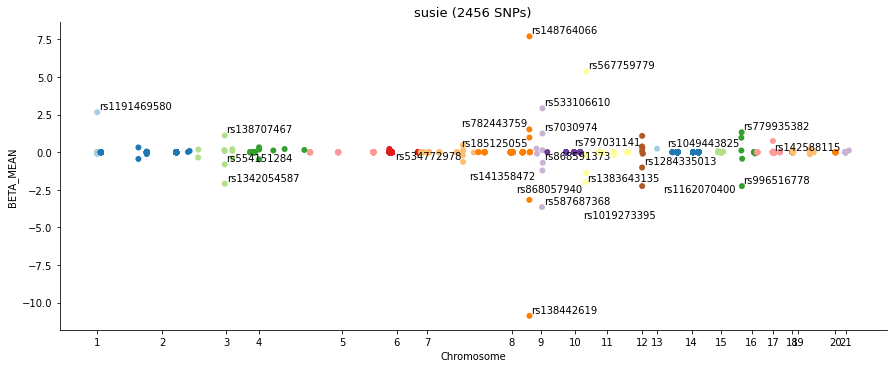

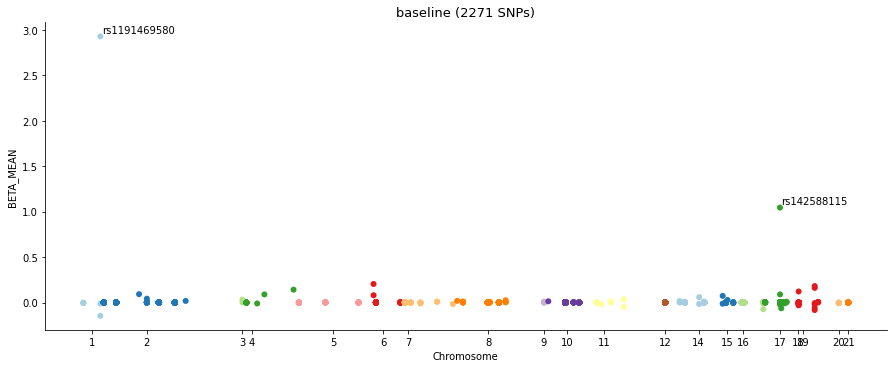

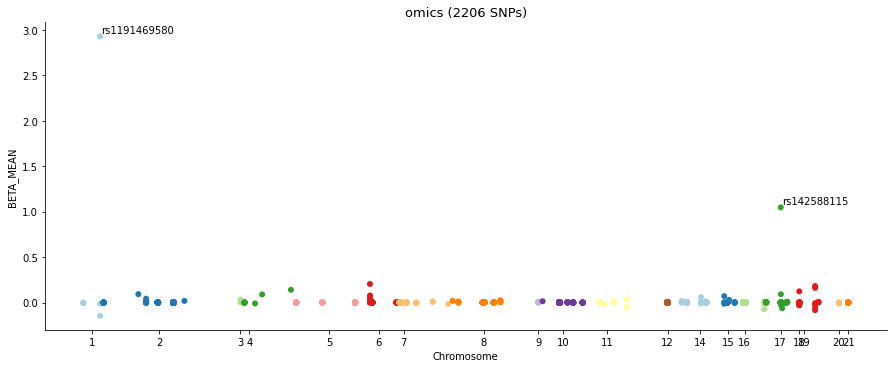

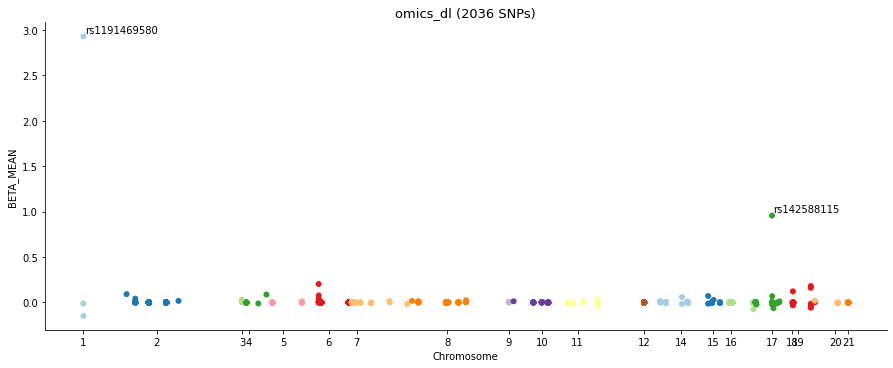

In [4]:
plot_beta(susie,'susie')
plot_beta(baseline,'baseline')
plot_beta(omics, 'omics')
plot_beta(dl, 'omics_dl')

In [13]:
print(abs(susie.BETA_MEAN).mean())
print(baseline.BETA_MEAN.mean())
print(omics.BETA_MEAN.mean())
print(dl.BETA_MEAN.mean())


0.02859699268115335
0.0021057099970412966
0.0022217662222715276
0.002288816313768926


In [14]:
susie[susie.BETA_MEAN>0.5]

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01,1.000000,2.662648,0.081626,chr1:206000001-209000001:1,207544249
313,rs138707467,3,90308518,C,T,0.0012,252054,2.376310,1.748680e-02,1.000000,1.118145,0.028868,chr3:89000001-92000001:3,535268986
735,rs782443759,8,142727318,C,G,0.0017,55361,1.701920,8.877070e-02,1.000000,1.517635,0.024449,chr8:141000001-144000001:2,1317794905
737,rs148764066,8,142943835,G,A,0.0006,252054,2.888750,3.867730e-03,1.000000,7.707427,0.041131,chr8:141000001-144000001:4,1318011422
739,rs185125055,8,142973512,G,C,0.0003,42083,-1.408180,1.590770e-01,1.000000,0.975876,0.058159,chr8:141000001-144000001:1,1318041099
751,rs533106610,9,32226910,G,A,0.0007,252054,4.225370,2.385440e-05,1.000000,2.920798,0.037840,chr9:31000001-34000001:3,1351393816
752,rs7030974,9,32230624,C,A,0.0013,252054,5.091670,3.549210e-07,0.883882,1.246366,0.452505,chr9:31000001-34000001:5,1351397530
807,rs567759779,11,14847009,C,G,0.0004,233257,4.499400,6.814580e-06,1.000000,5.381558,0.070556,chr11:13000001-16000001:1,1463452131
844,rs797031141,12,37419293,G,A,0.0007,42083,2.499580,1.243400e-02,0.999997,1.088998,0.038173,chr12:36000001-39000001:2,1607589293
1080,rs1049443825,16,46494555,C,G,0.0003,42083,2.504540,1.226120e-02,0.893272,0.967449,0.338802,chr16:45000001-48000001:4,1862521358


In [16]:
def plot_pip(df, df_name):
    cumulative_pos = []
    running_pos = 0
    for chrom, group_df in df.groupby('CHR'):  
        cumulative_pos.append(group_df['BP'] + running_pos)
        running_pos += group_df['BP'].max()

    df['cumulative_pos'] = pd.concat(cumulative_pos)
    g = sns.relplot(
        data = df,
        x = 'cumulative_pos',
        y = 'PIP',
        aspect = 2.5,
        hue = 'CHR',
        palette = 'Pastel1',
        linewidth=0,
        legend=False
    )
    g.ax.set_xlabel('Chromosome')
    g.ax.set_xticks(df.groupby('CHR')['cumulative_pos'].mean())
    g.ax.set_xticklabels(df['CHR'].unique())
    g.ax.set_title(df_name + ' (%s SNPs)'%(df.shape[0]), size=13)
    
    annotations = df[df.PIP > 0.95].apply(lambda p : g.ax.annotate(p['SNP'], (p['cumulative_pos'], p['PIP'])), axis=1).to_list()
    adjust_text(annotations, arrowprops = {'arrowstyle' : '->', 'color' : 'black'})

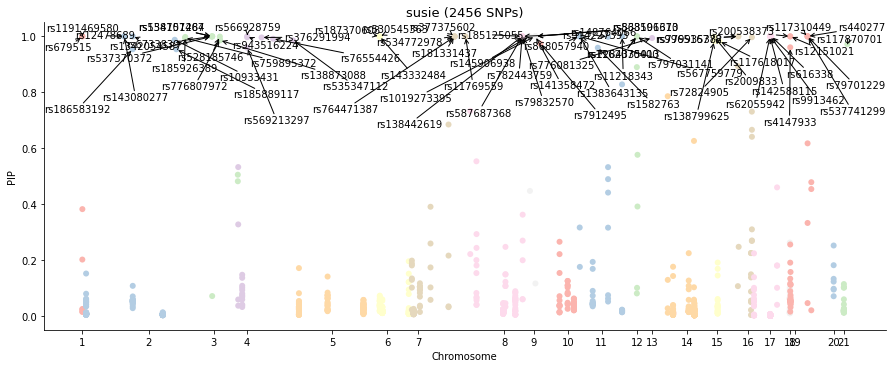

In [17]:
plot_pip(susie,'susie')

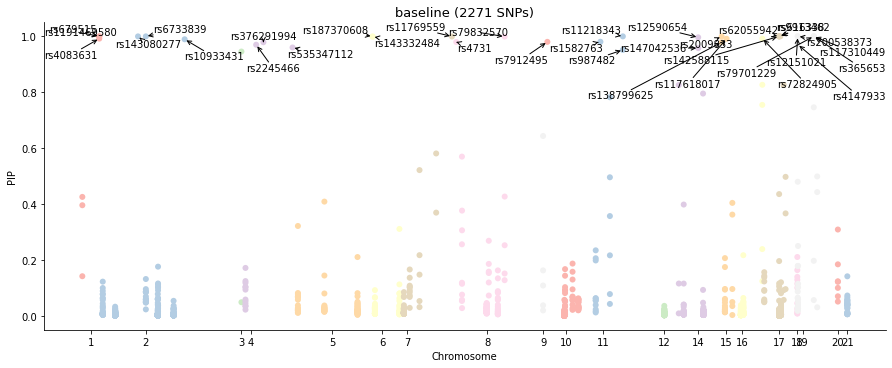

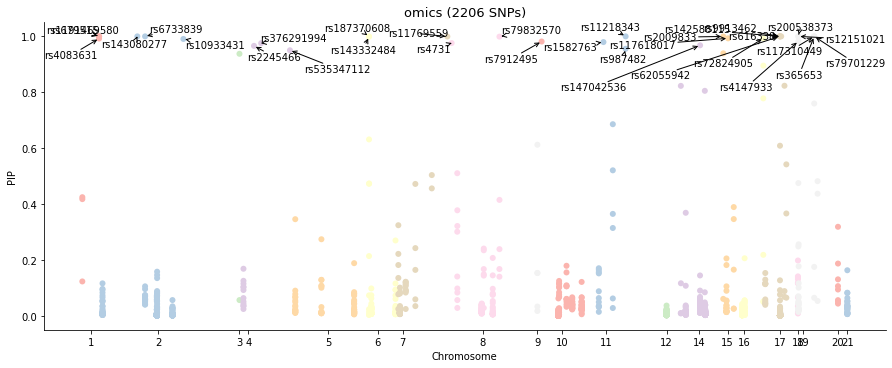

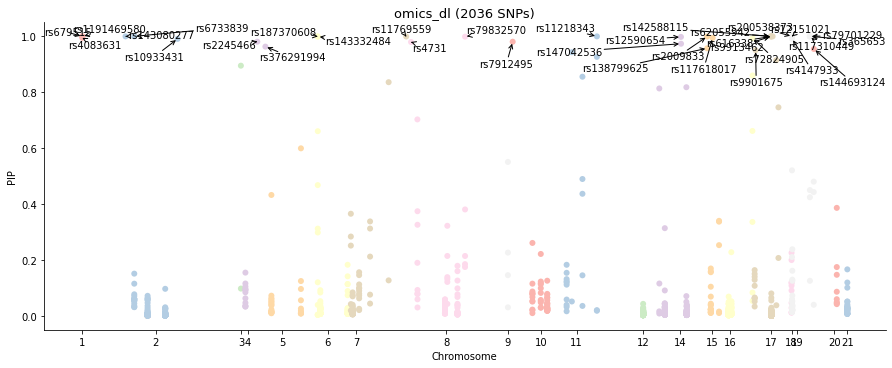

In [18]:
plot_pip(baseline,'baseline')
plot_pip(omics, 'omics')
plot_pip(dl, 'omics_dl')

In [23]:
susie_snp = susie[susie.PIP > 0.9]
baseline_snp = baseline[baseline.PIP > 0.9]
omics_snp = omics[omics.PIP > 0.9]
dl_snp = dl[dl.PIP > 0.9]
print(susie_snp.shape[0], baseline_snp.shape[0], omics_snp.shape[0], dl_snp.shape[0])

75 38 38 42


In [5]:
import upsetplot
from upsetplot import plot,from_contents
snp_list = from_contents({'susie':susie.SNP.tolist(),
                          'baseline':baseline.SNP.tolist(),
                          'omcis':omics.SNP.tolist(),
                          'omics_dl':dl.SNP.tolist()}
                         )

In [34]:
snp_list

id
susie baseline omcis omics_dl              
True  False    False False       rs12037841
      True     True  True      rs1191469580
      False    False False        rs1752684
      True     True  True          rs679515
      False    False False       rs10863417
...                                     ...
False False    False True        rs78556223
                     True        rs74531363
                     True        rs62063786
                     True         rs3752228
                     True       rs144693124

[3564 rows x 1 columns]

<Figure size 1080x432 with 0 Axes>

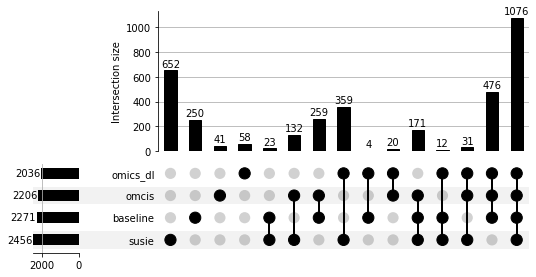

In [38]:
plt.figure(figsize=(15,6))
plot(snp_list , show_counts=True)
plt.savefig('/gpfs/commons/home/tlin/pic/PRS/snp_overlap_pip_0.9.pdf',transparent=True)

In [49]:
snp_list

id
susie baseline omcis omics_dl              
True  False    False False       rs12037841
      True     True  True      rs1191469580
      False    False False        rs1752684
      True     True  True          rs679515
      False    False False       rs10863417
...                                     ...
False False    False True        rs78556223
                     True        rs74531363
                     True        rs62063786
                     True         rs3752228
                     True       rs144693124

[3564 rows x 1 columns]

In [6]:
## only susie
susie_pip = snp_list.loc[(True, False, False,False)].values.reshape(-1)
susie_pip = susie[susie.SNP.isin(susie_pip)]
#susie_pip.to_csv(path + 'susie_snp.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [7]:
mutual_pip = snp_list.loc[(True, True,  True, True)].values.reshape(-1)
mutual_pip = susie[susie.SNP.isin(mutual_pip)]
#mutual_pip.to_csv(path + 'mutual_snp.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [8]:
## functional
functional = snp_list.loc[(False,True, True,  True)].values.reshape(-1)
functional= baseline[baseline.SNP.isin(functional)]
#functional.to_csv(path + 'functional_snp.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [21]:
functional.shape

(476, 14)

In [64]:
snp_list.loc[(True, True,  True, True)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


array(['rs1191469580', 'rs679515', 'rs143080277', ..., 'rs1876062',
       'rs2829969', 'rs2829970'], dtype=object)

In [71]:
type(mutual_pip)

numpy.ndarray

In [70]:
mutual_pip = snp_list.loc[(True, True,  True, True)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [6]:
## get the upset r plot for snp with pip > 0.75

import upsetplot
from upsetplot import plot,from_contents

def data_upsetR(df):
    return df[df.PIP >=0.75].SNP.tolist()
snp_list = from_contents({'susie':data_upsetR(susie),
                          'baseline':data_upsetR(baseline),
                          'omcis':data_upsetR(omics),
                          'omics_dl':data_upsetR(dl)}
                         )

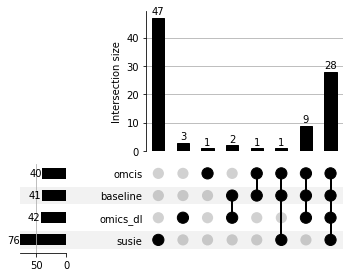

In [8]:

plot(snp_list , show_counts=True)
plt.savefig('/gpfs/commons/home/tlin/pic/PRS/snp_overlap_pip0.75.pdf',transparent=True)

In [42]:
#mutual ##28

mutual = snp_list.loc[(True, True,  True, True)].values.reshape(-1)
mutual = susie[susie.SNP.isin(mutual)]
mutual.to_csv(path + 'pip>0.75_mutual_snp.tsv', sep = '\t', index = False)
mutual

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01,1.000000,2.662648,0.081626,chr1:206000001-209000001:1
3,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33,0.999999,-0.114896,0.014090,chr1:206000001-209000001:2
56,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11,1.000000,0.318012,0.013869,chr2:104000001-107000001:1
58,rs6733839,2,127135234,C,T,0.3891,283145,20.071400,1.311790e-89,1.000000,0.043215,0.002065,chr2:126000001-129000001:1
307,rs10933431,2,233117202,G,C,0.2343,282331,8.606060,7.561430e-18,0.987818,0.016862,0.002983,chr2:232000001-235000001:1
340,rs376291994,4,59984152,A,G,0.0034,281212,5.433720,5.519130e-08,0.996063,0.117818,0.018784,chr4:58000001-61000001:1
426,rs187370608,6,40974457,G,A,0.0031,275586,10.906800,1.069540e-27,0.999902,0.211331,0.018195,chr6:39000001-42000001:1
427,rs143332484,6,41161469,C,T,0.0126,282331,8.898940,5.638450e-19,0.999171,0.080402,0.009298,chr6:40000001-43000001:2
637,rs11769559,7,143414203,T,C,0.4059,277461,-8.176470,2.922790e-16,0.999518,-0.016290,0.002063,chr7:142000001-145000001:1
742,rs79832570,8,144042819,T,C,0.0885,282331,6.566670,5.145410e-11,0.999405,0.024956,0.003585,chr8:143000001-146000001:1


In [41]:
only_susie = snp_list.loc[(True, False, False, False)].values.reshape(-1)
only_susie  = susie[susie.SNP.isin(only_susie )]
only_susie.to_csv(path + 'pip>0.75_susie_snp.tsv', sep = '\t', index = False)
only_susie

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET
55,rs12478689,2,105736833,C,T,0.0017,251632,1.434670,1.513810e-01,1.000000,-0.446123,0.023980,chr2:104000001-107000001:2
57,rs186583192,2,127132858,G,A,0.0018,252054,-2.391580,1.677610e-02,0.953883,-0.120311,0.035181,chr2:126000001-129000001:2
308,rs185889117,2,237327083,A,T,0.0033,273836,5.247220,1.544120e-07,0.953845,0.088642,0.025974,chr2:236000001-239000001:1
309,rs759895372,3,21851278,G,T,0.0005,233257,-3.329300,8.706550e-04,0.994423,-0.350133,0.052045,chr3:20000001-23000001:2
310,rs185926389,3,22497284,C,T,0.0015,247869,4.563330,5.034900e-06,0.997891,0.178993,0.027276,chr3:21000001-24000001:1
311,rs537370372,3,89069280,A,G,0.0075,277461,4.423690,9.702710e-06,0.999427,0.142878,0.012141,chr3:88000001-91000001:1
312,rs554151284,3,90280130,G,A,0.0018,252054,-2.782150,5.399970e-03,1.000000,-0.808705,0.023577,chr3:89000001-92000001:2
313,rs138707467,3,90308518,C,T,0.0012,252054,2.376310,1.748680e-02,1.000000,1.118145,0.028868,chr3:89000001-92000001:3
315,rs1342054587,3,90468185,G,A,0.0003,42083,-2.273170,2.301570e-02,1.000000,-2.094579,0.057709,chr3:89000001-92000001:4
316,rs528185746,3,109749482,A,G,0.0010,242504,3.943110,8.043150e-05,0.999298,0.206983,0.032301,chr3:108000001-111000001:3


In [ ]:
bl = snp_list.loc[(True, False, False, False)].values.reshape(-1)
only_susie  = susie[susie.SNP.isin(only_susie )]
only_susie.to_csv(path + 'pip>0.75_susie_snp.tsv', sep = '\t', index = False)
only_susie

In [11]:
only_functional_snp = snp_list.loc[(False, True,  True, True)].values.reshape(-1)
only_functional = baseline[baseline.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'pip>0.75_only_functional_snp_bl.tsv', sep = '\t', index = False)

only_functional = omics[omics.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'pip>0.75_only_functional_snp_omics.tsv', sep = '\t', index = False)

only_functional = dl[dl.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'pip>0.75_only_functional_snp_dl.tsv', sep = '\t', index = False)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [31]:
all_snps=snp_list.id.values

In [43]:
snp_list.id.to_csv(path + 'all_snps_rsid.txt',sep = '\t', header=None, index=False)

In [51]:
df1 = susie.loc[:,["SNP",'CHR','BP','A1','A2','MAF','N','Z','P','PIP']]
df2 = baseline.loc[:,["SNP",'CHR','BP','A1','A2','MAF','N','Z','P','PIP']]
df3 = omics.loc[:,["SNP",'CHR','BP','A1','A2','MAF','N','Z','P','PIP']]
df4 = dl.loc[:,["SNP",'CHR','BP','A1','A2','MAF','N','Z','P','PIP']]


In [62]:
all_snp = pd.concat([df1, df2, df3, df4], ignore_index=True)
all_snp[all_snp.PIP >=0.75].drop(['PIP'], axis = 1).drop_duplicates()

,SNP,CHR,BP,A1,A2,MAF,N,Z,P
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01
3,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33
55,rs12478689,2,105736833,C,T,0.0017,251632,1.434670,1.513810e-01
56,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11
57,rs186583192,2,127132858,G,A,0.0018,252054,-2.391580,1.677610e-02
...,...,...,...,...,...,...,...,...,...
4687,rs117310449,19,44890259,C,T,0.0169,281838,22.784000,6.607400e-115
6893,rs1160983,19,44893972,G,A,0.0295,282331,-19.282000,7.607740e-83
7522,rs1859788,7,100374211,A,G,0.3101,283145,8.556800,1.160440e-17
8156,rs9901675,17,7581494,G,A,0.0492,282331,-4.963000,6.941260e-07


In [66]:
#all_snp = all_snp[all_snp.PIP >=0.75].drop(['PIP'], axis = 1).drop_duplicates()
all_snp.to_csv(path + 'all_snps.txt',sep = '\t',  index=False)

In [65]:
all_snp

,SNP,CHR,BP,A1,A2,MAF,N,Z,P
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01
3,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33
55,rs12478689,2,105736833,C,T,0.0017,251632,1.434670,1.513810e-01
56,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11
57,rs186583192,2,127132858,G,A,0.0018,252054,-2.391580,1.677610e-02
...,...,...,...,...,...,...,...,...,...
4687,rs117310449,19,44890259,C,T,0.0169,281838,22.784000,6.607400e-115
6893,rs1160983,19,44893972,G,A,0.0295,282331,-19.282000,7.607740e-83
7522,rs1859788,7,100374211,A,G,0.3101,283145,8.556800,1.160440e-17
8156,rs9901675,17,7581494,G,A,0.0492,282331,-4.963000,6.941260e-07


In [12]:
##only dl
snp_list.loc[(False, False, False, True)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


array(['rs1859788', 'rs9901675', 'rs144693124'], dtype=object)

In [13]:
#Only omics
snp_list.loc[(False, False, True, False)].values.reshape(-1)

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


array(['rs1160983'], dtype=object)

In [15]:
#Only baseline dl
print(snp_list.loc[(False, True, False, True)].values.reshape(-1))

##only omics bl
print(snp_list.loc[(False, True, True, False)].values.reshape(-1))

##only omics bl susie
print(snp_list.loc[(True, True, True, False)].values.reshape(-1))


['rs10792832' 'rs12590654']
['rs4407053']
['rs535347112']


/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [9]:
## check maf

In [10]:
susie_pip

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos
0,rs12037841,1,207510847,T,G,0.1888,283145,-11.86540,1.790780e-32,0.201620,-0.005907,0.011854,chr1:206000001-209000001:3,207510847
2,rs1752684,1,207573951,A,G,0.1923,283145,-11.60190,4.028330e-31,0.024769,-0.000718,0.004553,chr1:206000001-209000001:3,207573951
4,rs10863417,1,207623552,A,T,0.1898,283145,-11.64080,2.556770e-31,0.022745,-0.000651,0.004281,chr1:206000001-209000001:3,207623552
5,rs10863418,1,207624893,C,G,0.1965,283145,-11.65690,2.117000e-31,0.014597,-0.000411,0.003387,chr1:206000001-209000001:3,207624893
6,rs4844610,1,207629207,A,C,0.1859,283145,-11.90380,1.130160e-32,0.382038,-0.011268,0.014432,chr1:206000001-209000001:3,207629207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,rs587709,19,54267597,C,T,0.3251,282331,-5.48000,4.253260e-08,0.020152,-0.000222,0.001575,chr19:53000001-56000001:1,2047868535
2425,rs7277389,21,25836105,T,C,0.4138,278275,-4.52381,6.073640e-06,0.011018,-0.000104,0.001013,chr21:24000001-27000001:1,2130128328
2431,rs2829948,21,25846915,G,A,0.4160,283145,-4.65854,3.184650e-06,0.018118,-0.000176,0.001322,chr21:24000001-27000001:1,2130139138
2450,rs9980932,21,25877114,C,T,0.4749,283145,-4.51220,6.416010e-06,0.013195,-0.000124,0.001101,chr21:24000001-27000001:1,2130169337


In [11]:
mutual_pip

,SNP,CHR,BP,A1,A2,MAF,N,Z,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,cumulative_pos
1,rs1191469580,1,207544249,A,G,0.0003,42083,-0.411946,6.803790e-01,1.000000,2.662648,0.081626,chr1:206000001-209000001:1,207544249
3,rs679515,1,207577223,T,C,0.1877,283145,-11.961500,5.650520e-33,0.999999,-0.114896,0.014090,chr1:206000001-209000001:2,207577223
56,rs143080277,2,105749599,T,C,0.0051,277586,6.503320,7.856520e-11,1.000000,0.318012,0.013869,chr2:104000001-107000001:1,313383084
58,rs6733839,2,127135234,C,T,0.3891,283145,20.071400,1.311790e-89,1.000000,0.043215,0.002065,chr2:126000001-129000001:1,334768719
61,rs35400498,2,127143138,G,T,0.2453,283145,2.757890,5.817490e-03,0.041483,0.000485,0.002378,chr2:126000001-129000001:3,334776623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,rs12482978,21,25875743,G,A,0.4745,283145,-4.617280,3.887950e-06,0.020812,-0.000200,0.001405,chr21:24000001-27000001:1,2130167966
2451,rs8127927,21,25878486,A,C,0.4747,283145,-4.524390,6.056990e-06,0.014228,-0.000135,0.001146,chr21:24000001-27000001:1,2130170709
2452,rs1876062,21,25884151,C,T,0.4764,283145,-4.475610,7.619350e-06,0.013431,-0.000127,0.001111,chr21:24000001-27000001:1,2130176374
2453,rs2829969,21,25885054,C,T,0.4763,283145,-4.500000,6.795350e-06,0.015743,-0.000150,0.001210,chr21:24000001-27000001:1,2130177277


### fin data aug 2024 v1

In [ ]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/finemap_v3_backup_teresa/'
susie = pd.read_csv(path + 'bellenguez_remove_index0_susie.txt', sep = '\t')
baseline = pd.read_csv(path + 'bellenguez_remove_index0_baseline.txt', sep = '\t')
omics  = pd.read_csv(path + 'bellenguez_remove_index0_omics.txt', sep = '\t')
dl= pd.read_csv(path + 'bellenguez_remove_index0_omics_dl.txt', sep = '\t')


plot_beta(susie,'susie')
plot_beta(baseline,'baseline')
plot_beta(omics, 'omics')
plot_beta(dl, 'omics_dl')

### fin data aug 2024 v2

In [4]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/summary_stats/alzheimers/ADSP_reference_panel/fine_mapping/annotations_dl/finemap_v3_backup_teresa/'
susie = pd.read_csv(path + 'bellenguez_remove_index0_susie.txt', sep = '\t')
baseline = pd.read_csv(path + 'bellenguez_remove_index0_baseline.txt', sep = '\t')
omics  = pd.read_csv(path + 'bellenguez_remove_index0_omics.txt', sep = '\t')
dl= pd.read_csv(path + 'bellenguez_remove_index0_omics_dl.txt', sep = '\t')

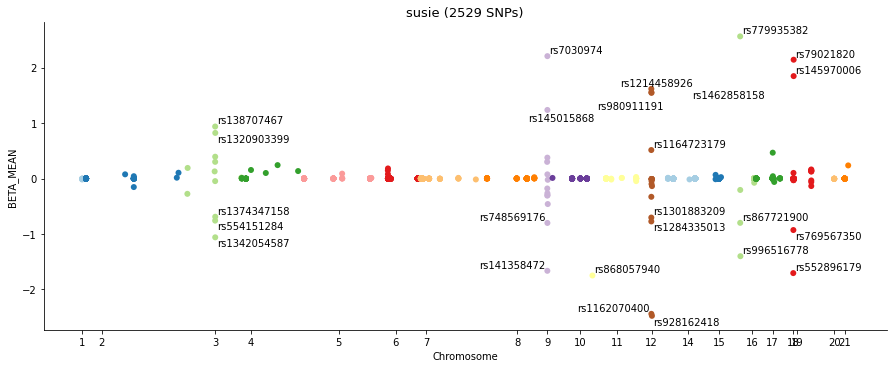

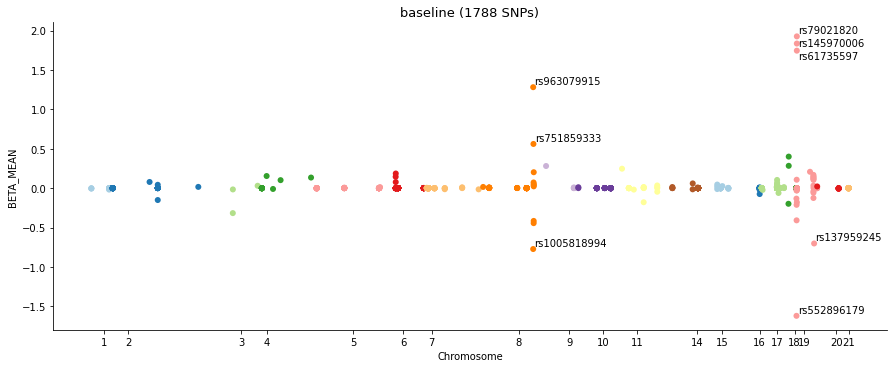

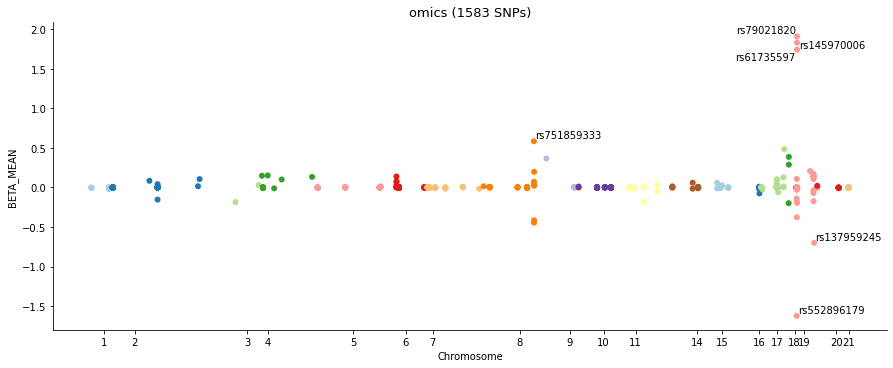

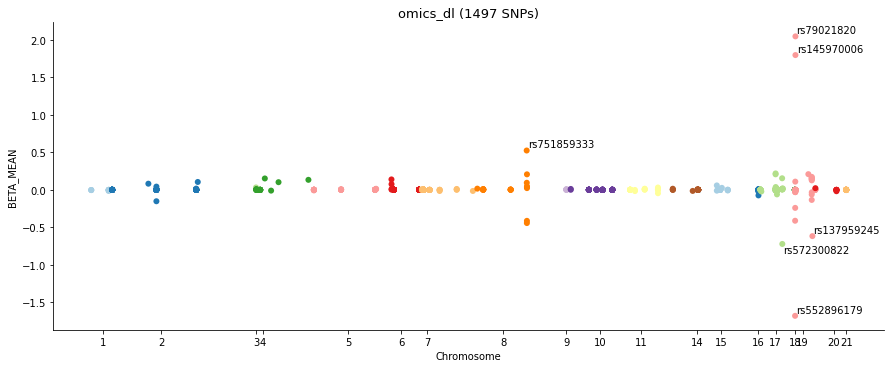

In [5]:
plot_beta(susie,'susie')
plot_beta(baseline,'baseline')
plot_beta(omics, 'omics')
plot_beta(dl, 'omics_dl')

In [7]:
import upsetplot
from upsetplot import plot,from_contents
snp_list = from_contents({'susie':susie.SNP.tolist(),
                          'baseline':baseline.SNP.tolist(),
                          'omcis':omics.SNP.tolist(),
                          'omics_dl':dl.SNP.tolist()}
                         )

In [8]:
snp_list

id
susie baseline omcis omics_dl             
True  True     True  True       rs12037841
                     False        rs679515
      False    False False      rs10863417
      True     True  True        rs4844610
                     True        rs1408077
...                                    ...
False False    False True      rs543413822
                     True        rs3764643
                     True        rs3752228
                     True       rs55969902
                     True       rs12977057

[2899 rows x 1 columns]

In [10]:
only_susie = snp_list.loc[(True, False, False, False)].values.reshape(-1)
only_susie  = susie[susie.SNP.isin(only_susie )]
only_susie.to_csv(path + 'susie_snp.tsv', sep = '\t', index = False)
only_susie

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,CHR,BP,SNP,A2,A1,Z,N,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,MAF,cumulative_pos
2,1,207623552,rs10863417,A,T,-11.62190,487511,3.190000e-31,0.010859,-0.000294,0.002854,chr1:206000001-209000001:1,0.795277,207623552
22,2,9427315,rs72775266,T,C,-4.73284,487511,2.214000e-06,0.006589,-0.000068,0.000873,chr2:8000001-11000001:1,0.206040,217058211
26,2,9435664,rs11680995,G,A,-4.72290,487511,2.325000e-06,0.006482,-0.000067,0.000864,chr2:8000001-11000001:1,0.206502,217066560
28,2,9442713,rs11683637,G,A,-4.71730,487511,2.390000e-06,0.006198,-0.000064,0.000844,chr2:8000001-11000001:1,0.205906,217073609
29,2,9442915,rs11674109,C,T,-4.73220,487511,2.221000e-06,0.006636,-0.000069,0.000876,chr2:8000001-11000001:1,0.206033,217073811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,21,25873388,rs2051181,A,G,-4.58030,487511,4.643000e-06,0.015840,-0.000143,0.001156,chr21:24000001-27000001:1,0.524913,2086642466
2519,21,25874628,rs2040274,C,T,-4.59012,487511,4.430000e-06,0.016063,-0.000145,0.001164,chr21:24000001-27000001:1,0.524551,2086643706
2522,21,25876078,rs2234981,A,G,-4.59613,487511,4.304000e-06,0.016946,-0.000153,0.001199,chr21:24000001-27000001:1,0.524737,2086645156
2523,21,25877114,rs9980932,C,T,-4.54262,487511,5.556000e-06,0.013037,-0.000116,0.001039,chr21:24000001-27000001:1,0.525582,2086646192


In [13]:
only_functional_snp = snp_list.loc[(False, True,  True, True)].values.reshape(-1)
only_functional = baseline[baseline.SNP.isin(only_functional_snp)]
only_functional.to_csv(path + 'only_functional_snp_bl.tsv', sep = '\t', index = False)

mutual = snp_list.loc[(True, True,  True, True)].values.reshape(-1)
mutual = susie[susie.SNP.isin(mutual)]
mutual.to_csv(path + 'mutual_snp.tsv', sep = '\t', index = False)
mutual

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """


,CHR,BP,SNP,A2,A1,Z,N,P,PIP,BETA_MEAN,BETA_SD,CREDIBLE_SET,MAF,cumulative_pos
0,1,207510847,rs12037841,T,G,-11.83130,487511,2.688000e-32,0.113426,-0.003212,0.009029,chr1:206000001-209000001:1,0.797199,207510847
3,1,207629207,rs4844610,A,C,-11.90290,487511,1.143000e-32,0.254812,-0.007299,0.012550,chr1:206000001-209000001:1,0.799319,207629207
4,1,207630796,rs1408077,A,C,-11.63540,487511,2.722000e-31,0.011970,-0.000325,0.002998,chr1:206000001-209000001:1,0.794891,207630796
5,2,9403723,rs11537589,G,A,-4.76516,487511,1.887000e-06,0.007809,-0.000081,0.000945,chr2:8000001-11000001:1,0.212877,217034619
6,2,9409624,rs10169262,C,T,-5.39030,487511,7.034000e-08,0.123721,-0.001500,0.004085,chr2:8000001-11000001:1,0.207652,217040520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2517,21,25872598,rs6516708,G,T,-4.57239,487511,4.822000e-06,0.015447,-0.000139,0.001140,chr21:24000001-27000001:1,0.524757,2086641676
2524,21,25878486,rs8127927,A,C,-4.54936,487511,5.381000e-06,0.014254,-0.000128,0.001091,chr21:24000001-27000001:1,0.524375,2086647564
2525,21,25884151,rs1876062,C,T,-4.49323,487511,7.015000e-06,0.012933,-0.000115,0.001034,chr21:24000001-27000001:1,0.522340,2086653229
2526,21,25885054,rs2829969,C,T,-4.51904,487511,6.212000e-06,0.015032,-0.000135,0.001123,chr21:24000001-27000001:1,0.522255,2086654132


{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

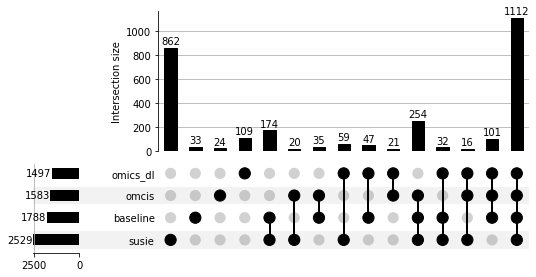

In [14]:
plot(snp_list , show_counts=True)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

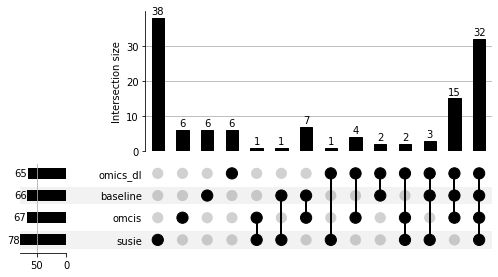

In [15]:
def data_upsetR(df):
    return df[df.PIP >=0.75].SNP.tolist()
snp_list = from_contents({'susie':data_upsetR(susie),
                          'baseline':data_upsetR(baseline),
                          'omcis':data_upsetR(omics),
                          'omics_dl':data_upsetR(dl)}
                         )


plot(snp_list , show_counts=True)